In [ ]:
# Import matplotlib library
import matplotlib.pyplot as plt #data visualisation
from sklearn.model_selection import train_test_split #split in 2 subparts
from sklearn.datasets import fetch_lfw_people #import dataset
import numpy as np #array processing

from sklearn.metrics import classification_report # measure the quality of predictions from a classification algorithm
from sklearn.metrics import confusion_matrix #evaluate the accuracy of a classification
from sklearn.model_selection import GridSearchCV #approach to hyperparameter tuning (choosing optimal parameter).
from sklearn.svm import SVC # C-support vector classification whose implementation is based on libsvm.
from sklearn.metrics import accuracy_score
from time import time
from sklearn.decomposition import PCA




In [ ]:
lfw_people = fetch_lfw_people( min_faces_per_person = 90,resize = 0.6)
#Ratio used to resize 

# details of data,pixels
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data #vector matrix format
n_features = X.shape[1] #size of data sample

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names #persons name
n_classes = target_names.shape[0] #no:of class labels

# Print Details about dataset
print("Number of Data Samples: % d" % n_samples)
print("Size of a data sample: % d" % n_features)
print("Number of Class Labels: % d" % n_classes)


Number of Data Samples:  1140
Size of a data sample:  4200
Number of Class Labels:  5


In [ ]:
print(h)

50


In [ ]:
print(w)

37


In [ ]:
print(lfw_people.images.shape)

(1140, 50, 37)


In [ ]:
print(X)

[[ 85.666664  81.666664  53.       ... 110.666664 117.333336 181.66667 ]
 [ 48.666668  56.333332  87.333336 ... 234.33333  231.66667  223.      ]
 [ 37.333332  39.666668  49.666668 ... 103.333336  81.333336  59.666668]
 ...
 [226.       220.       202.33333  ... 148.66667  147.66667  160.66667 ]
 [102.333336 126.       141.66667  ... 212.33333  217.66667  162.      ]
 [ 48.333332  91.333336 128.33333  ...  17.666666  30.333334  28.666666]]


In [ ]:
print(y)

[2 3 1 ... 4 2 4]


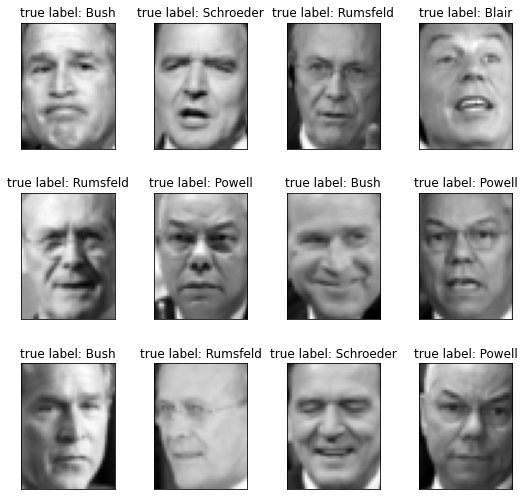

In [ ]:
# Function to plot images in 3 * 4
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
	plt.figure(figsize =(1.8 * n_col, 2.4 * n_row)) #width and height in inches
	plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)#pos of bottom edge...height of subplots
	for i in range(n_row * n_col):
		plt.subplot(n_row, n_col, i + 1) #plot images till 3*4
		plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray) #colormap to grey
		plt.title(titles[i], size = 12)
		plt.xticks(()) #default location and lable in axis
		plt.yticks(())

# Generate true labels above the images
def true_title(Y, target_names, i):
	true_name = target_names[Y[i]].rsplit(' ', 1)[-1] 
	return 'true label: % s' % (true_name)

true_titles = [true_title(y, target_names, i)
					for i in range(y.shape[0])]
plot_gallery(X, true_titles, h, w)


In [ ]:
print(true_titles)

['true label: Bush', 'true label: Schroeder', 'true label: Rumsfeld', 'true label: Blair', 'true label: Rumsfeld', 'true label: Powell', 'true label: Bush', 'true label: Powell', 'true label: Bush', 'true label: Rumsfeld', 'true label: Schroeder', 'true label: Powell', 'true label: Bush', 'true label: Bush', 'true label: Blair', 'true label: Schroeder', 'true label: Bush', 'true label: Bush', 'true label: Bush', 'true label: Bush', 'true label: Powell', 'true label: Bush', 'true label: Schroeder', 'true label: Powell', 'true label: Powell', 'true label: Powell', 'true label: Bush', 'true label: Rumsfeld', 'true label: Rumsfeld', 'true label: Powell', 'true label: Powell', 'true label: Bush', 'true label: Rumsfeld', 'true label: Bush', 'true label: Bush', 'true label: Powell', 'true label: Bush', 'true label: Bush', 'true label: Bush', 'true label: Blair', 'true label: Rumsfeld', 'true label: Bush', 'true label: Schroeder', 'true label: Powell', 'true label: Blair', 'true label: Rumsfel

In [ ]:
print(target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42) 
print("size of training Data is % d and Testing Data is % d" %(
        y_train.shape[0], y_test.shape[0]))

size of training Data is  855 and Testing Data is  285


In [ ]:
print(X_train.shape)

(855, 1850)


In [ ]:
n_components = 180 #extract 150 eigenfaces,966 features in the training set,we will reduce them to 150

print("Extracting %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))

t0 = time() #return time in sec

pca = PCA(n_components=n_components,whiten=True).fit(X_train)
#linear dimensionality reduction

print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w)) 
# reshape PCA components & define eigenfaces, name given to set of eigenvectors in the computer vision problem of face recognition

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
#PCA’s transform on both X_train and X_test to reduce dimensionality


Extracting 180 eigenfaces from 855 faces
done in 0.299s


In [ ]:
print(X_train_pca.shape)

(855, 150)


In [ ]:
print("Fitting the classifier to the training set")
t0 = time()

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              #penalty parameter of the error term.smooth decision boundary and classifying the training points correctly
			'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
			#gamma is for non linear hyperplanes.higher the gamma value it tries to exactly fit the training data set
			#coeff of kernel

clf = GridSearchCV(
	SVC(kernel ='rbf', class_weight ='balanced'), param_grid)
#kernel selects type of hyperplane separate the data,‘radial basis fn' uses a non linear hyper-plane
#Set the parameter C of class i to class_weight[i]*C
clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("predict peoples name on test set")
y_pred = clf.predict(X_test_pca)


# print classification results
print(classification_report(y_test, y_pred, target_names = target_names))

#measure of exactness, what % of data classifier predicted as +ve are actually +ve
#measure of completeness,what % of data sample did the classifier labeled as +ve
# 2(precision*recall)/precision+recall ,harmonic mean
#number of actual occurrences in the specified dataset

#Micro-averaged: sum of individual TP ,FP of system
#TP1+TP2+TP3/TP1+TP2+TP3+FP1+FP2+FP3

#Weighted-averaged: each classes’s contribution to the average is weighted by its size
# (total of actual class A /total no:) * P + ....



Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.001)
predict peoples name on test set
                   precision    recall  f1-score   support

     Colin Powell       0.91      0.92      0.91        64
  Donald Rumsfeld       0.88      0.88      0.88        32
    George W Bush       0.88      0.93      0.90       127
Gerhard Schroeder       1.00      0.86      0.93        29
       Tony Blair       0.90      0.79      0.84        33

         accuracy                           0.90       285
        macro avg       0.91      0.88      0.89       285
     weighted avg       0.90      0.90      0.90       285



In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print("ACCURACY IS")
print(score)
print("")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

ACCURACY IS
0.8982456140350877

CONFUSION MATRIX
[[ 59   1   3   0   1]
 [  0  28   4   0   0]
 [  5   3 118   0   1]
 [  1   0   2  25   1]
 [  0   0   7   0  26]]


In [ ]:
print(y_pred)

[0 0 2 3 2 0 0 4 2 2 2 2 1 0 2 0 4 4 2 0 0 2 1 4 2 2 4 2 2 1 3 1 1 0 0 0 2
 0 3 2 2 2 2 2 2 4 0 2 2 0 2 0 2 0 2 2 2 2 2 0 2 2 2 0 0 3 3 2 0 2 4 2 1 3
 2 2 2 4 2 2 0 2 2 2 3 2 2 2 0 1 2 2 2 4 2 0 2 0 2 3 2 3 2 4 2 3 2 1 2 2 3
 2 2 2 0 2 2 1 2 1 2 0 2 0 2 1 3 1 2 4 2 1 0 0 4 2 3 4 0 2 2 0 2 1 2 0 3 2
 2 2 2 2 2 4 2 3 4 0 0 4 0 2 2 1 0 1 2 0 2 0 1 2 2 2 0 2 1 2 2 4 4 0 4 2 4
 0 2 2 2 2 2 2 2 2 0 0 0 2 0 2 0 3 0 3 2 2 0 1 0 2 3 4 4 0 2 1 2 2 2 2 2 3
 0 2 1 2 0 2 2 2 2 0 2 2 4 4 2 0 2 2 1 2 2 0 2 0 0 2 0 2 2 3 0 0 2 3 1 2 0
 2 3 2 2 1 4 2 1 0 4 3 4 3 2 0 0 2 4 1 0 3 2 0 2 1 4]


In [ ]:
print(X_train_pca.shape)


(855, 150)


In [ ]:
print(X_test_pca.shape)

(285, 150)


In [ ]:
X_test_pca

array([[ 0.62634706, -0.860788  , -0.21353823, ..., -0.387359  ,
        -0.6753674 ,  1.5954295 ],
       [ 1.0518318 , -0.48524472,  0.23505208, ..., -1.8859044 ,
        -1.6390675 , -1.9493161 ],
       [ 0.11173338,  1.7570392 ,  1.8382651 , ..., -0.86983955,
         0.86223733,  1.1247966 ],
       ...,
       [-0.2989999 , -0.2201094 ,  0.62494844, ...,  2.433993  ,
        -0.13059671,  1.1315225 ],
       [-0.5697184 ,  0.09314898, -0.16237766, ..., -0.25643542,
        -1.8433129 ,  0.9244007 ],
       [ 1.8307769 ,  0.04684983,  0.2313329 , ...,  1.8118153 ,
        -1.3838023 ,  1.5425211 ]], dtype=float32)

In [ ]:
X_train_pca

array([[ 0.4048423 ,  0.08303021,  1.0483037 , ...,  0.7395317 ,
         0.32859328,  1.0231875 ],
       [ 0.94470775, -0.84106654, -1.136365  , ..., -1.9917458 ,
         1.1219428 , -0.9770673 ],
       [-0.00689475, -0.9030108 , -0.15583089, ...,  0.2211221 ,
         0.42105287,  1.3590997 ],
       ...,
       [-0.9752827 , -1.0395066 , -0.3761035 , ...,  0.26321965,
        -0.65264696,  0.22701639],
       [-0.8875628 ,  1.5701287 ,  0.2515466 , ..., -0.88582987,
        -0.47094196,  1.2476317 ],
       [ 0.44349885,  1.2115465 , -0.43494233, ...,  0.6583158 ,
        -1.0520499 , -1.8814896 ]], dtype=float32)

In [ ]:
print(eigenfaces)

[[[-3.40807997e-03 -4.41927277e-03 -6.10676687e-03 ... -1.02066742e-02
   -8.85126460e-03 -9.36437864e-03]
  [-3.83669231e-03 -4.98888874e-03 -7.19808973e-03 ... -1.08333286e-02
   -9.41368379e-03 -1.01382993e-02]
  [-5.25322743e-03 -6.18039398e-03 -8.71010683e-03 ... -1.22073302e-02
   -1.00899069e-02 -1.06453951e-02]
  ...
  [ 1.88477337e-03  2.90260930e-03  4.80398536e-04 ... -1.34432092e-02
   -1.19171534e-02 -1.05490256e-02]
  [ 6.44014217e-04  1.87747553e-03  2.08643920e-04 ... -1.33516295e-02
   -1.10776117e-02 -9.14983731e-03]
  [-8.05033371e-04  3.80341779e-04 -5.04578231e-04 ... -1.23299509e-02
   -1.05900085e-02 -8.44159536e-03]]

 [[ 2.03740001e-02  1.90772470e-02  2.21011490e-02 ... -2.30083056e-02
   -2.45581605e-02 -2.47559994e-02]
  [ 2.06679627e-02  2.05511302e-02  2.49560829e-02 ... -2.33787522e-02
   -2.47625001e-02 -2.52604522e-02]
  [ 2.13256534e-02  2.27125026e-02  2.72999424e-02 ... -2.38612033e-02
   -2.50583775e-02 -2.61668414e-02]
  ...
  [ 3.16696726e-02  3.5

In [ ]:
print(X_train.shape[0])

855


In [ ]:
print(X_train)

[[ 50.        53.333332  74.333336 ...  18.666666  17.666666  20.666666]
 [201.66667  181.       149.       ...  63.333332  64.666664  88.      ]
 [ 44.666668  50.333332  62.333332 ... 232.66667  234.       239.      ]
 ...
 [ 62.        53.333332  44.666668 ... 236.       172.33333   54.      ]
 [112.333336 122.666664 127.333336 ...  40.333332  42.        43.      ]
 [112.       123.666664 142.33333  ... 119.333336  33.        21.666666]]
